# Data visualization and making it meanging full

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<AxesSubplot:ylabel='Frequency'>

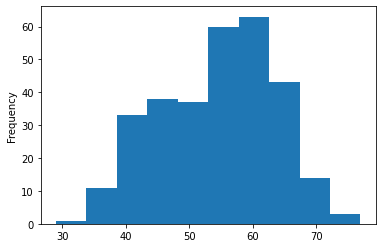

In [5]:
heart_disease['age'].plot.hist()

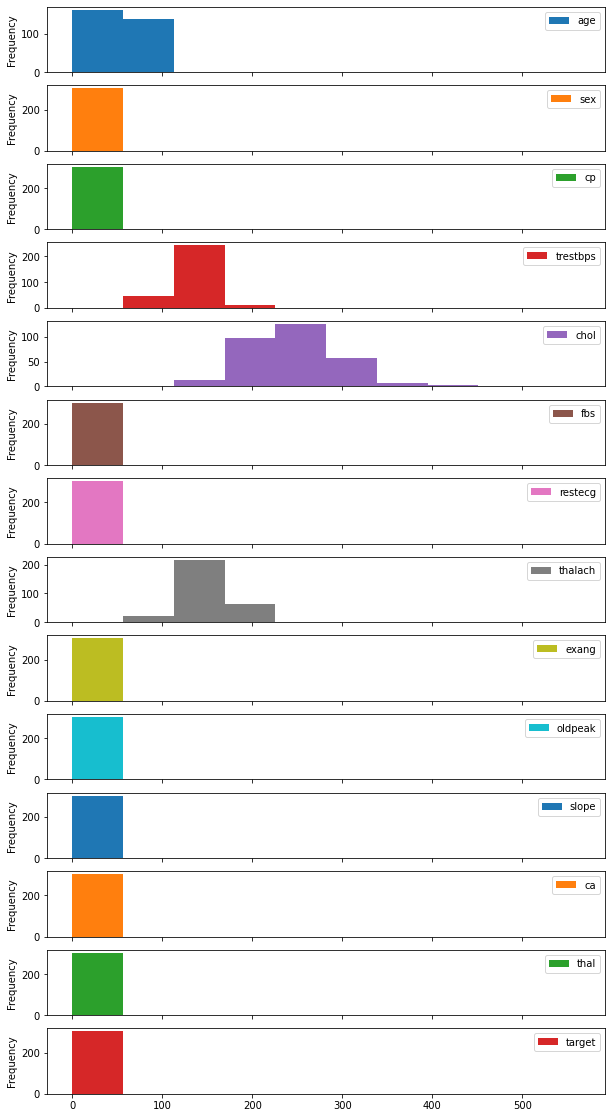

In [9]:
heart_disease.plot.hist(figsize=(10,20) ,subplots = True);

### Which one method should we use between (pyplot vs matplotlib OO method)?

* When plotting somthing quickly, use pyplot methods
* When plotting something more advanced, use the OO method

In [10]:
over_50 = heart_disease[heart_disease['age'] > 50]

In [11]:
over_50

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


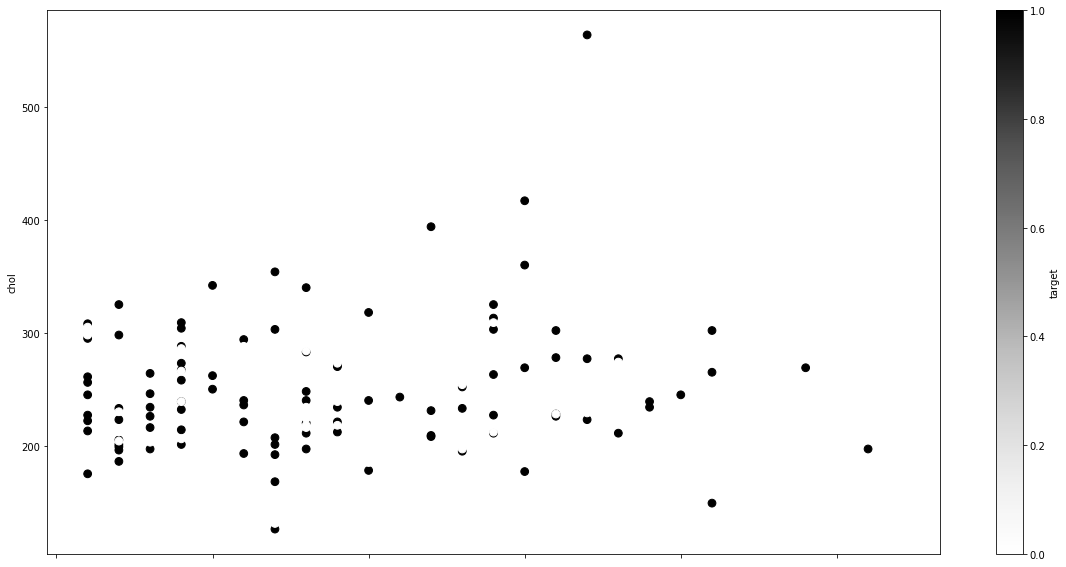

In [19]:
# pyplot method
over_50.plot(figsize=(20,10),kind='scatter' , x='age', y ='chol' , c='target', s=60);

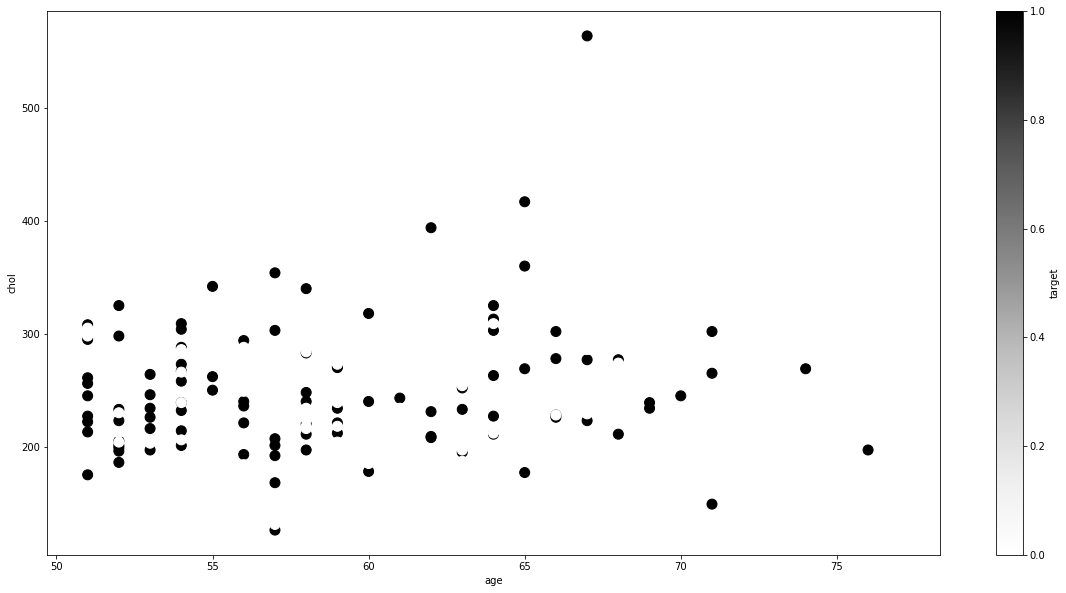

In [26]:
# OO method mixed with pyplot
fix, ax = plt.subplots(figsize=(10,6))
over_50.plot(figsize=(20,10), kind='scatter' , x='age', y ='chol' , c='target', s=100, ax=ax);


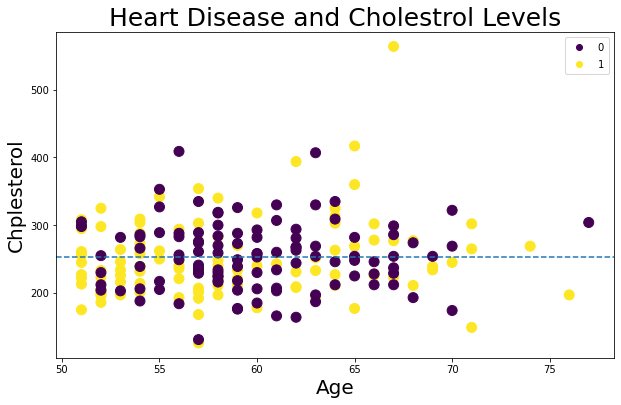

In [61]:
# Customizing
plt.figure(figsize=(10,6))
plt.xlabel('Age', fontsize=20);
plt.ylabel('Chplesterol',fontsize=20)
plt.title('Heart Disease and Cholestrol Levels', fontsize=25)
scatter = plt.scatter(over_50['age'], over_50['chol'], c=over_50['target'], s=100);
plt.legend(*scatter.legend_elements())
plt.axhline(over_50.chol.mean(), linestyle='--')
plt.show()

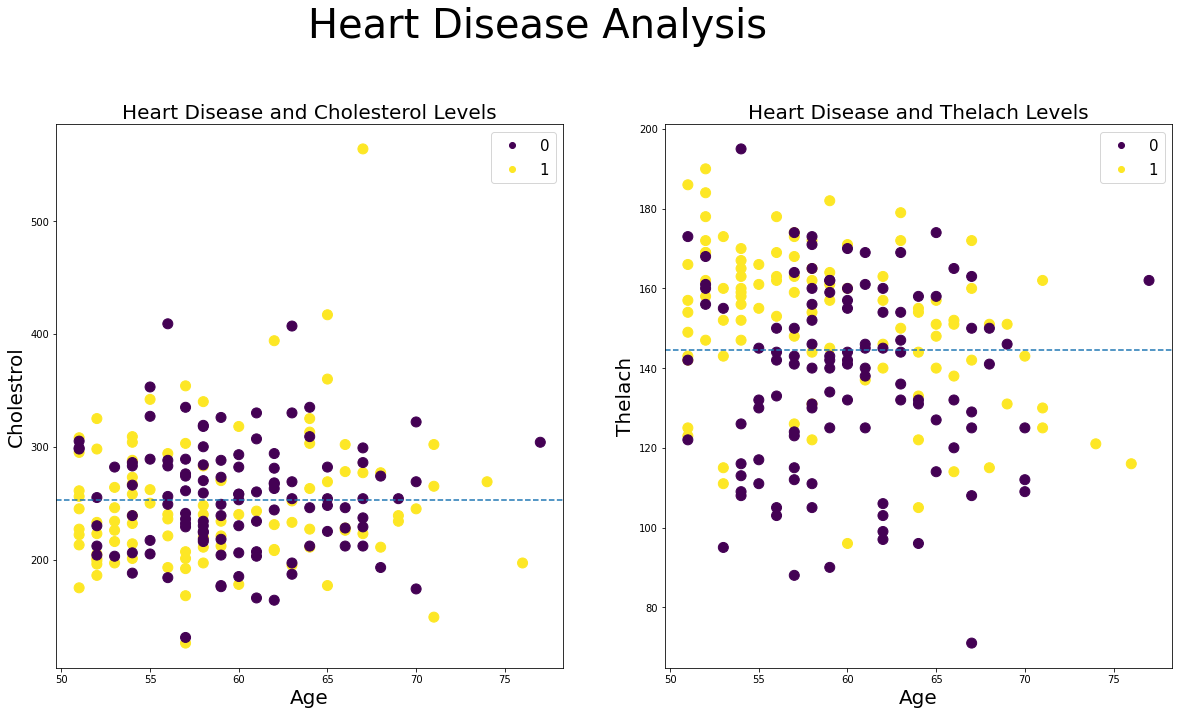

In [106]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Heart Disease and Cholesterol Levels', fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Cholestrol', fontsize=20)
scatter = plt.scatter(over_50['age'],over_50['chol'], c=over_50['target'], s=100)
plt.legend(*scatter.legend_elements(), fontsize=15)
plt.axhline(y=over_50['chol'].mean(), linestyle='--')
plt.subplot(1,2,2)
plt.title('Heart Disease and Thelach Levels',fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Thelach', fontsize=20)
scatter = plt.scatter(over_50['age'],over_50['thalach'], c=over_50['target'], s=100)
plt.legend(*scatter.legend_elements(), fontsize=15)
plt.axhline(y=over_50['thalach'].mean(), linestyle='--')
plt.figtext(x=.3, y=1, s='Heart Disease Analysis', fontsize=40)
plt.show()

### OO Way of plotting

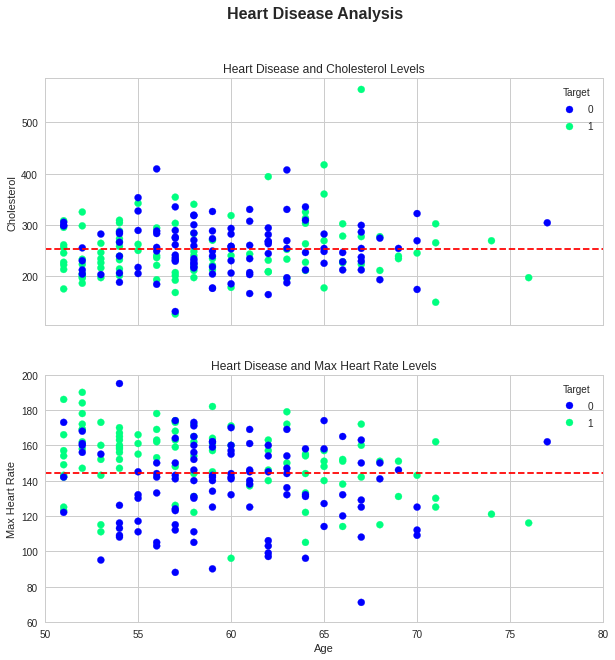

In [111]:
# Axis 0, 1 (row 0, column 0)
plt.style.use('seaborn-whitegrid')
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))
scatter = ax0.scatter(over_50["age"], 
                      over_50["chol"], 
                      c=over_50["target"],
                      cmap='winter')
ax0.set(title="Heart Disease and Cholesterol Levels",
        ylabel="Cholesterol")

# Set the x axis
ax0.set_xlim([50, 80])

# Setup a mean line
ax0.axhline(y=over_50["chol"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax0.legend(*scatter.legend_elements(), title="Target")

# Axis 1, 1 (row 1, column 1)
scatter = ax1.scatter(over_50["age"], 
                      over_50["thalach"], 
                      c=over_50["target"],
                      cmap='winter')
ax1.set(title="Heart Disease and Max Heart Rate Levels",
        xlabel="Age",
        ylabel="Max Heart Rate")

# Set the y axis
ax1.set_ylim([60, 200])

# Setup a mean line
ax1.axhline(y=over_50["thalach"].mean(), 
            color='r', 
            linestyle='--', 
            label="Average");
ax1.legend(*scatter.legend_elements(), title="Target")

# Title the figure
fig.suptitle('Heart Disease Analysis', fontsize=16, fontweight='bold');


In [113]:
fig.savefig('HeartDis')